In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
labels = np.loadtxt('labels.txt')
print(len(labels))

10246


In [3]:
p_emb = np.load('para.npy')
q_emb = np.load('q.npy')
a1_emb = np.load('a1.npy')
a2_emb = np.load('a2.npy')
a3_emb = np.load('a3.npy')
a4_emb = np.load('a4.npy')
labels = np.loadtxt('labels.txt')
data_split = 0.8

In [4]:
q_emb.shape

(10246, 1000)

In [5]:
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.metrics import accuracy_score

def classifier(p_emb,q_emb,a1_emb,a2_emb,a3_emb,a4_emb,labels,data_split):
      print("p_emb,q_emb,a1_emb,a2_emb,a3_emb,a4_emb each shape must be (number of samples, size of embedding)")
      print("labels size must be (number of samples, )")
      print("paragraph embedding size = ", p_emb.shape)
      print("given question embedding size = ", q_emb.shape)
      print("given answer 1 embedding size = ", a1_emb.shape)
      print("given answer 2 embedding size = ", a2_emb.shape)
      print("given answer 3 embedding size = ", a3_emb.shape)
      print("given answer 4 embedding size = ", a4_emb.shape)
      print("given labels numpy file size = ", labels.shape)
      X = np.concatenate((p_emb, q_emb, a1_emb, a2_emb,a3_emb,a4_emb),axis=1)
      y = np.array(labels)  
      n = y.shape[0]
      data_split_index = int(np.ceil(n*data_split))
      X_train = np.array(X[:data_split_index])
      y_train = np.array(y[:data_split_index])
      X_test = np.array(X[data_split_index:])
      y_test = np.array(y[data_split_index:])

      clf = LogisticRegression(random_state=0,max_iter=500)
      clf.fit(X_train, y_train)
      y_pred = clf.predict(X_test)

      print("Accuracy of the Model is = ", accuracy_score(y_test, y_pred))

In [6]:
classifier(p_emb,q_emb,a1_emb,a2_emb,a3_emb,a4_emb,labels,data_split)

p_emb,q_emb,a1_emb,a2_emb,a3_emb,a4_emb each shape must be (number of samples, size of embedding)
labels size must be (number of samples, )
paragraph embedding size =  (10246, 1000)
given question embedding size =  (10246, 1000)
given answer 1 embedding size =  (10246, 1000)
given answer 2 embedding size =  (10246, 1000)
given answer 3 embedding size =  (10246, 1000)
given answer 4 embedding size =  (10246, 1000)
given labels numpy file size =  (10246,)
Accuracy of the Model is =  0.3064909712054661


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [7]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [8]:
#MLP classifier
import numpy as np
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.optimizers import SGD
from keras.regularizers import l2
from keras.layers import Dropout
from keras.layers import BatchNormalization

def nn_classifier(p_emb,q_emb,a1_emb,a2_emb,a3_emb,a4_emb,labels,data_split):
      print("p_emb,q_emb,a1_emb,a2_emb,a3_emb,a4_emb each shape must be (number of samples, size of embedding)")
      print("labels size must be (number of samples, )")
      print("paragraph embedding size = ", p_emb.shape)
      print("given question embedding size = ", q_emb.shape)
      print("given answer 1 embedding size = ", a1_emb.shape)
      print("given answer 2 embedding size = ", a2_emb.shape)
      print("given answer 3 embedding size = ", a3_emb.shape)
      print("given answer 4 embedding size = ", a4_emb.shape)
      print("given labels numpy file size = ", labels.shape)
      X = np.concatenate((p_emb, q_emb, a1_emb, a2_emb,a3_emb,a4_emb),axis=1)
      X -=np.mean(X,axis =0)
      X /=np.std(X,axis=0)
      y = np.array(labels)  
      n = y.shape[0]
      data_split_index = int(np.ceil(n*data_split))
      X_train = np.array(X[:data_split_index])
      y_train = np.array(y[:data_split_index])
      X_test = np.array(X[data_split_index:])
      y_test = np.array(y[data_split_index:])


      # one hot encoding for labels in Network model 
      categorical_labels = to_categorical(y_train, num_classes=4)
      categorical_labels_test = to_categorical(y_test, num_classes=4)

      model = Sequential()
      model.add(Dense(128, input_shape=(X_train.shape[1],), activation='relu', kernel_regularizer=l2(0.04), bias_regularizer=l2(0.04),kernel_initializer='GlorotUniform'))
      model.add(Dropout(0.4))
      model.add(BatchNormalization())
      model.add(Dense(64, activation='relu',kernel_regularizer=l2(0.04), bias_regularizer=l2(0.04),kernel_initializer='GlorotUniform'))
      #model.add(Dropout(0.2))
      model.add(Dense(32, activation='relu',kernel_regularizer=l2(0.04), bias_regularizer=l2(0.04),kernel_initializer='GlorotUniform'))
      model.add(Dense(8, activation='relu',kernel_regularizer=l2(0.04), bias_regularizer=l2(0.04),kernel_initializer='GlorotUniform'))
      model.add(Dense(4, activation='softmax')) 

      #opt = Adam(lr=0.00006)
      opt = Adam(lr=0.00005)
      model.compile(loss='mse', optimizer=opt, metrics=['accuracy'])
      model.summary()

      history = model.fit(X_train, categorical_labels, validation_data=(X_test, categorical_labels_test), epochs=25, batch_size=64)
      # summarize history for accuracy
      plt.plot(history.history['accuracy'])
      plt.plot(history.history['val_accuracy'])
      plt.title('model accuracy')
      plt.ylabel('accuracy')
      plt.xlabel('epoch')
      plt.legend(['train', 'test'], loc='upper left')
      plt.show()
      # summarize history for loss
      plt.plot(history.history['loss'])
      plt.plot(history.history['val_loss'])
      plt.title('model loss')
      plt.ylabel('loss')
      plt.xlabel('epoch')
      plt.legend(['train', 'test'], loc='upper left')
      plt.show()
      #categorical_crossentropy

p_emb,q_emb,a1_emb,a2_emb,a3_emb,a4_emb each shape must be (number of samples, size of embedding)
labels size must be (number of samples, )
paragraph embedding size =  (10246, 1000)
given question embedding size =  (10246, 1000)
given answer 1 embedding size =  (10246, 1000)
given answer 2 embedding size =  (10246, 1000)
given answer 3 embedding size =  (10246, 1000)
given answer 4 embedding size =  (10246, 1000)
given labels numpy file size =  (10246,)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               768128    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               512       
____________________________________________________________

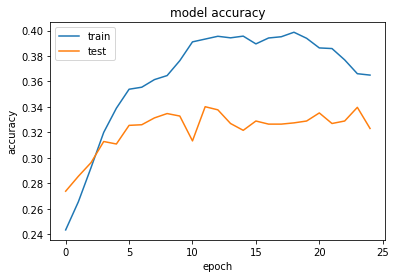

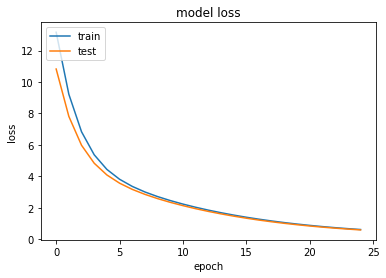

In [9]:
data_split = 0.80
nn_classifier(p_emb,q_emb,a1_emb,a2_emb,a3_emb,a4_emb,labels,data_split)
